# Incidence du syndrome grippal

In [23]:
# Activer l'affichage des graphiques dans le notebook (jupyter) en ligne.
%matplotlib inline

# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt  # Pour la création de graphiques
import pandas as pd  # Pour la manipulation des données
import isoweek  # Pour gérer les semaines ISO

In [41]:
# URL où les données d'incidence du syndrome grippal sont téléchargées
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [42]:
# Nom du fichier local où les données seront stockées
data_file = "syndrome-grippal.csv"

# Vérifier si le fichier local existe, et s'il n'existe pas, le télécharger depuis l'URL
import os
import urllib.request

# Vérifier si le fichier local n'existe pas
if not os.path.exists(data_file):
    # Télécharger les données depuis l'URL et les enregistrer dans le fichier local
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json) :

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [43]:
# Lire les données depuis le fichier local CSV en sautant la première ligne (commentaire)
raw_data = pd.read_csv(data_file, skiprows=1)

# Afficher les données brutes
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202339          3   82112   70891.0   93333.0    124       107.0   
1     202338          3   63567   55525.0   71609.0     96        84.0   
2     202337          3   49085   42079.0   56091.0     74        63.0   
3     202336          3   38247   32237.0   44257.0     58        49.0   
4     202335          3   31695   26013.0   37377.0     48        39.0   
5     202334          3   26663   21057.0   32269.0     40        32.0   
6     202333          3   19144   13161.0   25127.0     29        20.0   
7     202332          3   14641   10285.0   18997.0     22        15.0   
8     202331          3   15286   10705.0   19867.0     23        16.0   
9     202330          3   13205    8647.0   17763.0     20        13.0   
10    202329          3   11122    7113.0   15131.0     17        11.0   
11    202328          3    9179    5703.0   12655.0     14         9.0   
12    202327          3    8999    5763.0   12235.0     14         9.0   
13    202326          3    9023    5934.0   12112.0     14         9.0   
14    202325          3   10090    6739.0   13441.0     15        10.0   
15    202324          3   11308    7639.0   14977.0     17        11.0   
16    202323          3   14300   10661.0   17939.0     22        17.0   
17    202322          3   18303   13822.0   22784.0     28        21.0   
18    202321          3   16460   12188.0   20732.0     25        19.0   
19    202320          3   16162   11963.0   20361.0     24        18.0   
20    202319          3   16901   12577.0   21225.0     25        18.0   
21    202318          3   19929   15402.0   24456.0     30        23.0   
22    202317          3   27007   21779.0   32235.0     41        33.0   
23    202316          3   27875   22767.0   32983.0     42        34.0   
24    202315          3   37455   30993.0   43917.0     56        46.0   
25    202314          3   48060   40671.0   55449.0     72        61.0   
26    202313          3   64859   56800.0   72918.0     98        86.0   
27    202312          3   72750   64499.0   81001.0    109        97.0   
28    202311          3   74638   66420.0   82856.0    112       100.0   
29    202310          3   76368   68243.0   84493.0    115       103.0   
...      ...        ...     ...       ...       ...    ...         ...   
2001  198521          3   26096   19621.0   32571.0     47        35.0   
2002  198520          3   27896   20885.0   34907.0     51        38.0   
2003  198519          3   43154   32821.0   53487.0     78        59.0   
2004  198518          3   40555   29935.0   51175.0     74        55.0   
2005  198517          3   34053   24366.0   43740.0     62        44.0   
2006  198516          3   50362   36451.0   64273.0     91        66.0   
2007  198515          3   63881   45538.0   82224.0    116        83.0   
2008  198514          3  134545  114400.0  154690.0    244       207.0   
2009  198513          3  197206  176080.0  218332.0    357       319.0   
2010  198512          3  245240  223304.0  267176.0    445       405.0   
2011  198511          3  276205  252399.0  300011.0    501       458.0   
2012  198510          3  353231  326279.0  380183.0    640       591.0   
2013  198509          3  369895  341109.0  398681.0    670       618.0   
2014  198508          3  389886  359529.0  420243.0    707       652.0   
2015  198507          3  471852  432599.0  511105.0    855       784.0   
2016  198506          3  565825  518011.0  613639.0   1026       939.0   
2017  198505          3  637302  592795.0  681809.0   1155      1074.0   
2018  198504          3  424937  390794.0  459080.0    770       708.0   
2019  198503          3  213901  174689.0  253113.0    388       317.0   
2020  198502          3   97586   80949.0  114223.0    177       147.0   
2021  198501          3   85489   65918.0  105060.0    155       120.0   
2022  198452          3   84830   60602.0  109058.0    154       110.0   
2023  198451

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [44]:
# Sélectionner les lignes contenant au moins une valeur manquante (NaN)
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1794  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1794        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [45]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) à partir des données brutes
data = raw_data.dropna().copy()

# Afficher les données nettoyées (sans valeurs manquantes) et en créer une copie
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202339          3   82112   70891.0   93333.0    124       107.0   
1     202338          3   63567   55525.0   71609.0     96        84.0   
2     202337          3   49085   42079.0   56091.0     74        63.0   
3     202336          3   38247   32237.0   44257.0     58        49.0   
4     202335          3   31695   26013.0   37377.0     48        39.0   
5     202334          3   26663   21057.0   32269.0     40        32.0   
6     202333          3   19144   13161.0   25127.0     29        20.0   
7     202332          3   14641   10285.0   18997.0     22        15.0   
8     202331          3   15286   10705.0   19867.0     23        16.0   
9     202330          3   13205    8647.0   17763.0     20        13.0   
10    202329          3   11122    7113.0   15131.0     17        11.0   
11    202328          3    9179    5703.0   12655.0     14         9.0   
12    202327          3    8999    5763.0   12235.0     14         9.0   
13    202326          3    9023    5934.0   12112.0     14         9.0   
14    202325          3   10090    6739.0   13441.0     15        10.0   
15    202324          3   11308    7639.0   14977.0     17        11.0   
16    202323          3   14300   10661.0   17939.0     22        17.0   
17    202322          3   18303   13822.0   22784.0     28        21.0   
18    202321          3   16460   12188.0   20732.0     25        19.0   
19    202320          3   16162   11963.0   20361.0     24        18.0   
20    202319          3   16901   12577.0   21225.0     25        18.0   
21    202318          3   19929   15402.0   24456.0     30        23.0   
22    202317          3   27007   21779.0   32235.0     41        33.0   
23    202316          3   27875   22767.0   32983.0     42        34.0   
24    202315          3   37455   30993.0   43917.0     56        46.0   
25    202314          3   48060   40671.0   55449.0     72        61.0   
26    202313          3   64859   56800.0   72918.0     98        86.0   
27    202312          3   72750   64499.0   81001.0    109        97.0   
28    202311          3   74638   66420.0   82856.0    112       100.0   
29    202310          3   76368   68243.0   84493.0    115       103.0   
...      ...        ...     ...       ...       ...    ...         ...   
2001  198521          3   26096   19621.0   32571.0     47        35.0   
2002  198520          3   27896   20885.0   34907.0     51        38.0   
2003  198519          3   43154   32821.0   53487.0     78        59.0   
2004  198518          3   40555   29935.0   51175.0     74        55.0   
2005  198517          3   34053   24366.0   43740.0     62        44.0   
2006  198516          3   50362   36451.0   64273.0     91        66.0   
2007  198515          3   63881   45538.0   82224.0    116        83.0   
2008  198514          3  134545  114400.0  154690.0    244       207.0   
2009  198513          3  197206  176080.0  218332.0    357       319.0   
2010  198512          3  245240  223304.0  267176.0    445       405.0   
2011  198511          3  276205  252399.0  300011.0    501       458.0   
2012  198510          3  353231  326279.0  380183.0    640       591.0   
2013  198509          3  369895  341109.0  398681.0    670       618.0   
2014  198508          3  389886  359529.0  420243.0    707       652.0   
2015  198507          3  471852  432599.0  511105.0    855       784.0   
2016  198506          3  565825  518011.0  613639.0   1026       939.0   
2017  198505          3  637302  592795.0  681809.0   1155      1074.0   
2018  198504          3  424937  390794.0  459080.0    770       708.0   
2019  198503          3  213901  174689.0  253113.0    388       317.0   
2020  198502          3   97586   80949.0  114223.0    177       147.0   
2021  198501          3   85489   65918.0  105060.0    155       120.0   
2022  198452          3   84830   60602.0  109058.0    154       110.0   
2023  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [46]:
# Définition d'une fonction pour convertir l'année et la semaine en période
def convert_week(year_and_week_int):
    # Convertir l'entier en une chaîne de caractères
    year_and_week_str = str(year_and_week_int)
    
    # Extraire l'année (les 4 premiers caractères de la chaîne)
    year = int(year_and_week_str[:4])
    
    # Extraire le numéro de semaine (le reste de la chaîne)
    week = int(year_and_week_str[4:])
    
    # Créer un objet isoweek.Week avec l'année et la semaine
    w = isoweek.Week(year, week)
    
    # Convertir l'objet isoweek.Week en une période pandas
    return pd.Period(w.day(0), 'W')

# Appliquer la fonction convert_week à la colonne 'week' et créer une nouvelle colonne 'period'
data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [47]:
# Définir la colonne 'period' comme index du DataFrame et trier le DataFrame par cet index
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [48]:
# Obtenir l'index (colonne 'period') du DataFrame trié
periods = sorted_data.index

# Parcourir les périodes consécutives et vérifier la différence temporelle entre elles
for p1, p2 in zip(periods[:-1], periods[1:]):
    # Calculer la différence temporelle entre la fin de la période p1 et le début de la période p2
    delta = p2.to_timestamp() - p1.end_time
    
    # Vérifier si la différence temporelle est supérieure à 1 seconde
    if delta > pd.Timedelta('1s'):
        # Afficher les paires de périodes consécutives qui ont une différence temporelle inattendue
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

In [49]:
# Convertir la colonne 'inc' en type numérique (float)
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='coerce')
print(sorted_data['inc'].dtypes)

int64


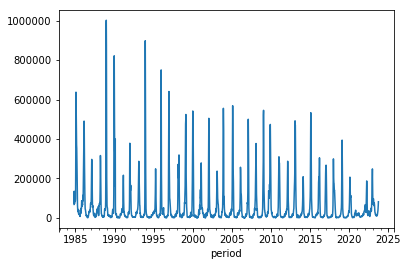

In [50]:
# Tracer un graphique de la colonne 'inc' du DataFrame trié
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

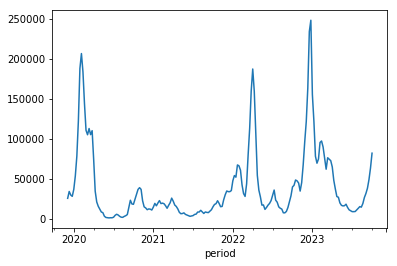

In [51]:
# Tracer un graphique des 200 dernières entrées de la colonne 'inc' du DataFrame trié
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [52]:
# Créer une liste des premières semaines d'août pour chaque année entre 1985 et la dernière année de l'index de sorted_data
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [53]:
# Initialisation des listes pour stocker les données annuelles
year = []  # Liste des années
yearly_incidence = []  # Liste des incidences annuelles

# Parcourir les paires d'intervalles annuels définies par first_august_week
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    # Extraire les données d'incidence pour une année donnée
    one_year = sorted_data['inc'][week1:week2-1]
    
    # Vérifier que chaque année a environ 52 semaines d'incidence
    assert abs(len(one_year) - 52) < 2
    
    # Ajouter la somme des incidences de l'année à la liste yearly_incidence
    yearly_incidence.append(one_year.sum())
    
    # Ajouter l'année correspondante à la liste year
    year.append(week2.year)

# Créer une série pandas avec les données annuelles et les années comme index
yearly_incidence = pd.Series(data=yearly_incidence, index=year)


Voici les incidences annuelles.

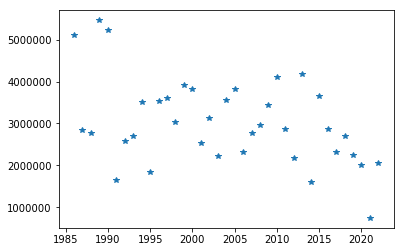

In [38]:
# Tracer un graphique de dispersion des données d'incidence annuelle avec un style en étoile
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [54]:
# Trier les données d'incidence annuelle par ordre croissant
yearly_incidence.sort_values()

2021     743449
2014    1600941
1991    1659249
1995    1840410
2020    2010315
2022    2060304
2012    2175217
2003    2234584
2019    2254386
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
2018    2705325
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

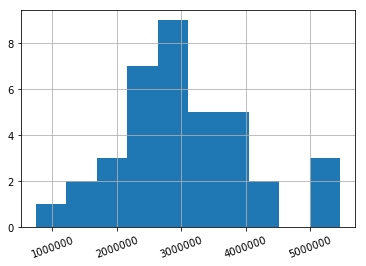

In [55]:
# Tracer un histogramme des données d'incidence annuelle avec une rotation de l'axe des x de 20 degrés
yearly_incidence.hist(xrot=20)